In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("SpeedDating.csv")
variables = data.drop([data.columns[0], 'TARGET'], axis=1)
target = data['TARGET']

variables

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,0.14,7.0
1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,10.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,0.54,7.0
2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,9.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,0.61,7.0
3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,9.0,6.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.21,6.0
4,50.0,0.0,30.0,10.0,0.0,10.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,15.0,15.0,20.0,25.0,10.0,15.0,2.0,6.0,2.0,1.0,25.0,10.0,20.0,20.0,10.0,15.0,0.35,5.0
1044,15.0,15.0,25.0,25.0,15.0,5.0,4.0,8.0,3.0,2.0,25.0,10.0,20.0,20.0,10.0,15.0,0.45,5.0
1045,20.0,20.0,20.0,20.0,10.0,10.0,5.0,4.0,5.0,3.0,25.0,10.0,20.0,20.0,10.0,15.0,0.13,5.0
1046,15.0,15.0,25.0,25.0,20.0,0.0,4.0,7.0,3.0,0.0,25.0,10.0,20.0,20.0,10.0,15.0,0.54,5.0


In [79]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import dalex as dx
import shap

import warnings
warnings.filterwarnings("ignore")

v_train, v_test, t_train, t_test = train_test_split(variables, target, random_state=69, test_size=0.2)

observations = [6, 9]

def use_model(model):
    name = type(model).__name__
    print(f"Model: {name}")
    model.fit(v_train, t_train)

    def predict(i):
        id = int(i)
        obId = observations[id]
        prediction = model.predict_proba(variables.iloc[[obId]])[0, 1]
        actual = target[obId]
        
        return [obId, prediction, actual]

    predictions = np.array([predict(x) for x in range(2)])

    print(tabulate(predictions, ["Observation", "Prediction", "Actual"], tablefmt="github"))

    shap_explainer = shap.Explainer(model, variables)
    shap_values = None
    if name != "LogisticRegression":
        shap_values = shap_explainer(variables, check_additivity=False)
        for i in observations:
            shap.plots.waterfall(shap_values[i][:, 1])
    
    explainer = dx.Explainer(model, variables, target, predict_function=lambda m, x: m.predict_proba(x)[:, 1], label=name)
    shap_attributions = [explainer.predict_parts(variables.iloc[[i]], type="shap", label=f'Row {i}') for i in observations]
    shap_attributions[0].plot(shap_attributions[1::])
target.iloc[observations]

6    1
9    0
Name: TARGET, dtype: int64

Model: RandomForestClassifier
|   Observation |   Prediction |   Actual |
|---------------|--------------|----------|
|             6 |         0.78 |        1 |
|             9 |         0.06 |        0 |


100%|===================| 2086/2096 [00:14<00:00]        

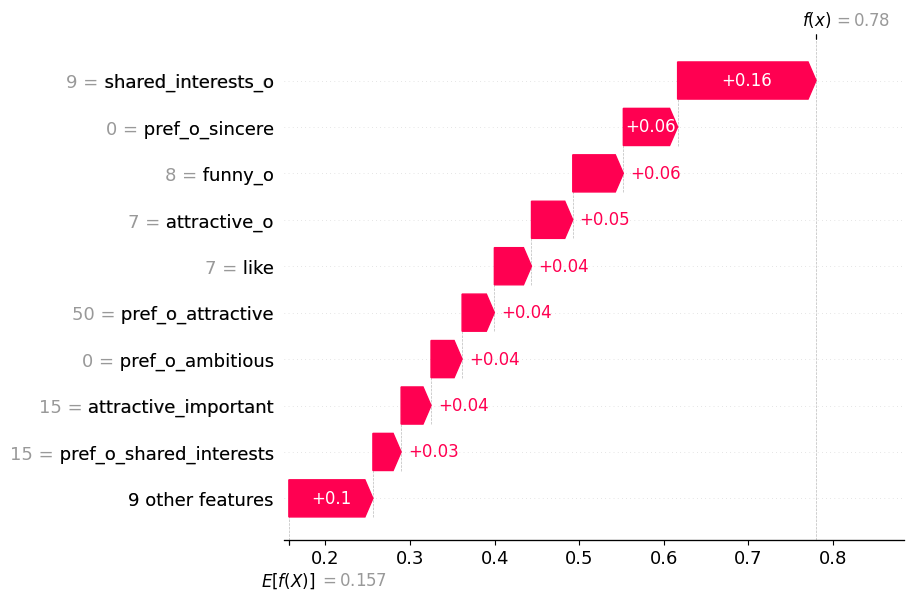

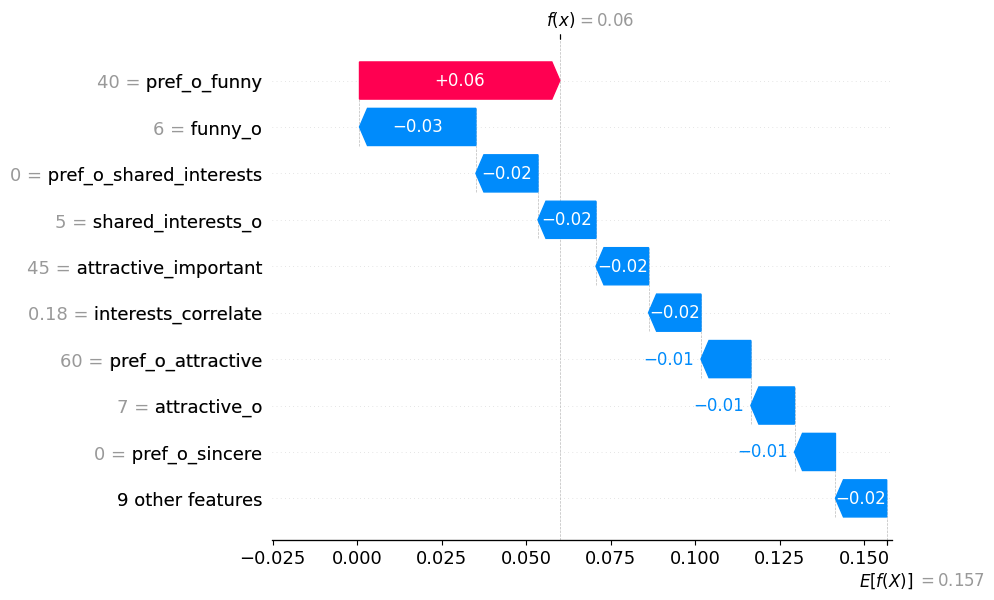

Preparation of a new explainer is initiated

  -> data              : 1048 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1048 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RandomForestClassifier
  -> predict function  : <function use_model.<locals>.<lambda> at 0x000001913E45E480> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.183, max = 0.97
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.74, mean = -0.00544, max = 0.98
  -> model_info        : package sklearn

A new explainer has been created!


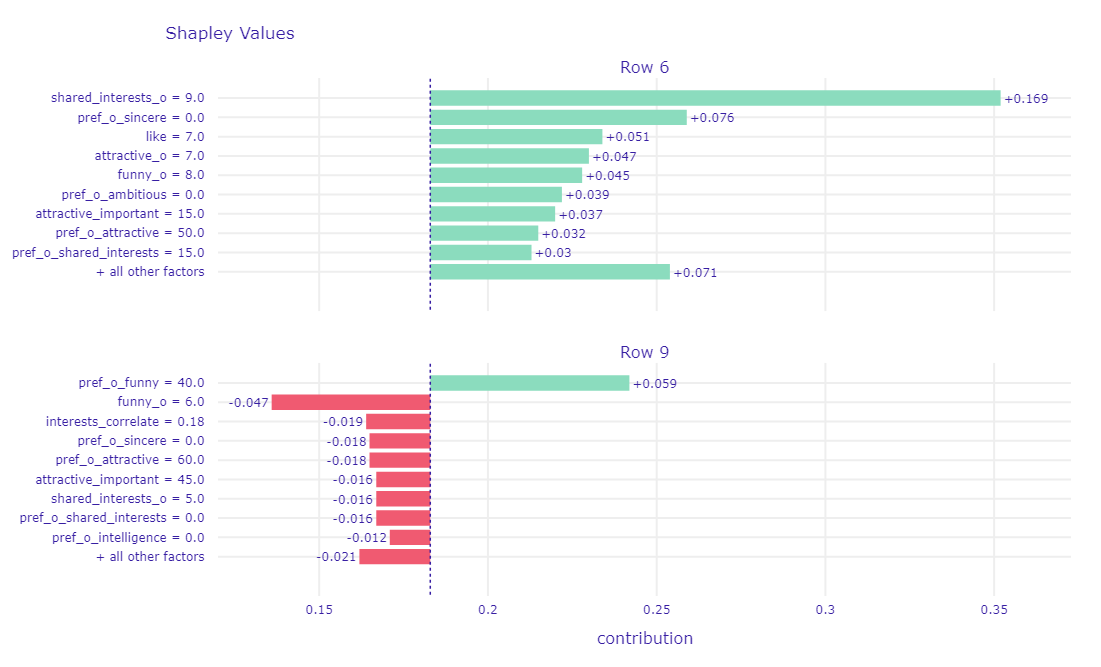

Model: LogisticRegression
|   Observation |   Prediction |   Actual |
|---------------|--------------|----------|
|             6 |     0.243915 |        1 |
|             9 |     0.21817  |        0 |
Preparation of a new explainer is initiated

  -> data              : 1048 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1048 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LogisticRegression
  -> predict function  : <function use_model.<locals>.<lambda> at 0x000001913E4F89A0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000254, mean = 0.179, max = 0.936
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.914, mean = -0.00153, max = 0.988
  -> model_info        

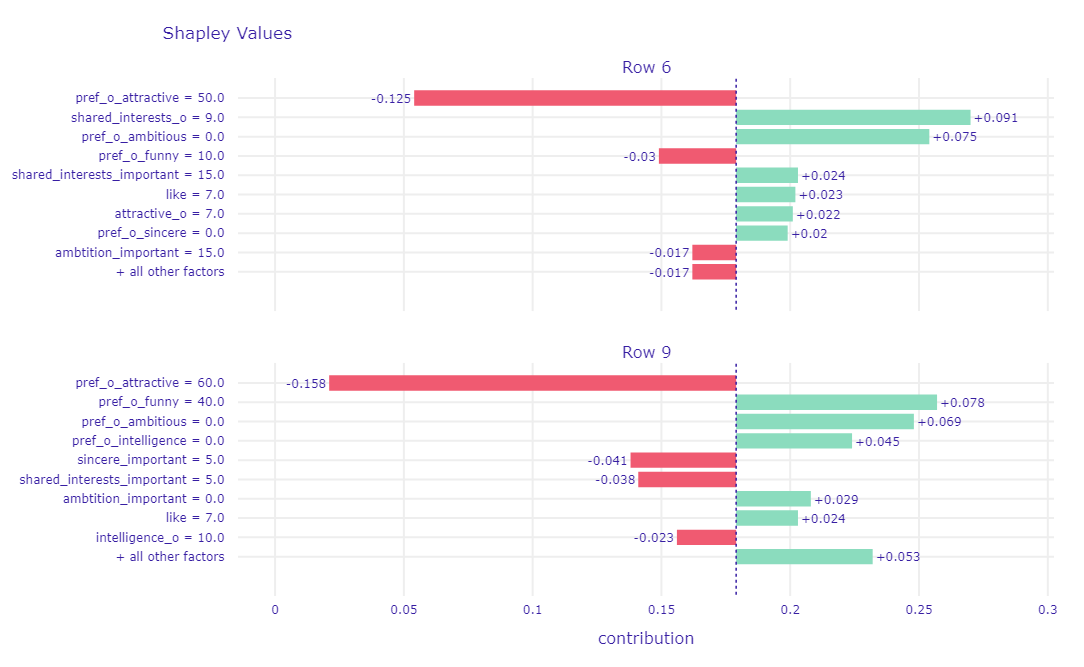

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = [RandomForestClassifier(), LogisticRegression(max_iter=1000)]

for model in models:
    use_model(model)